### 3. Descriptive analysis
--- 


In [30]:
import pandas as pd
#importing libraries for word occurrences and count
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
analysis_tweets = pd.read_csv('Tweets\\final_tweets_classified.csv')

In [32]:
analysis_tweets.shape

(5875, 11)

In [33]:
analysis_tweets.columns

Index(['Column1', 'index', 'ID', 'Tweet', 'Timestamp', 'Likes', 'Retweets',
       'Length', 'Date', 'Time', 'Class'],
      dtype='object')

In [34]:
#summary of data frame
analysis_tweets.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Column1    5875 non-null   int64  
 1   index      5875 non-null   int64  
 2   ID         5875 non-null   float64
 3   Tweet      5875 non-null   object 
 4   Timestamp  5875 non-null   object 
 5   Likes      5875 non-null   int64  
 6   Retweets   5875 non-null   int64  
 7   Length     5875 non-null   int64  
 8   Date       5875 non-null   object 
 9   Time       5875 non-null   object 
 10  Class      5875 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 505.0+ KB


In [35]:
#check if the data frame has the right type
analysis_tweets.head(8)

,Column1,index,ID,Tweet,Timestamp,Likes,Retweets,Length,Date,Time,Class
0,0,0,1.497300e+18,قبيل الاحتفال بـ اليوم الدولي لمراة تستعد كوكب...,2/25/22 23:00,1,0,198,2/25/2022,8:00:01 PM,positive
1,1,1,1.497300e+18,لحظات نزول دابانغ سلمان خان علا ارض المسرح اك...,2/25/22 22:57,2,0,207,2/25/2022,7:57:14 PM,positive
2,2,2,1.497300e+18,ليلة ميزة بانتظارنا الحانها شرقية نجومها است...,2/25/22 22:47,0,0,232,2/25/2022,7:47:38 PM,positive
3,3,3,1.497300e+18,اصدق حفلة احلا فستان مستان انا بختار واذا حفل...,2/25/22 22:40,3,1,168,2/25/2022,7:40:37 PM,positive
4,4,4,1.497290e+18,جنون بعده جنون دابانغ سلمان خان يستعرض حشد كب...,2/25/22 22:21,5,2,178,2/25/2022,7:21:09 PM,positive
5,5,5,1.497290e+18,اوركسترا الفردوس تمتع زوار اكسبو دبي بعزفها ل...,2/25/22 22:17,2,0,163,2/25/2022,7:17:27 PM,positive
6,6,6,1.497290e+18,اكسبو اكسبو دبي الامارات جناح سلطنة عمان ارق...,2/25/22 22:13,4,1,147,2/25/2022,7:13:25 PM,positive
7,7,7,1.497280e+18,ليلة حتكون مليءة باحلا الانغام الشرقية كونوا ...,2/25/22 21:55,7,2,251,2/25/2022,6:55:27 PM,positive


In [36]:
#statistic of charachter column
analysis_tweets.describe(include=['object'])

,Tweet,Timestamp,Date,Time,Class
count,5875,5875,5875,5875,5875
unique,5875,4922,39,5389,3
top,قبيل الاحتفال بـ اليوم الدولي لمراة تستعد كوكب...,3/31/22 21:59,4/1/2022,11:00:00 AM,positive
freq,1,12,700,12,3189


In [37]:
#calculate mean of the retweets column
analysis_tweets.loc[:,"Retweets"].mean()

2.4308085106382977

In [38]:
#calculate mean of the likes column
analysis_tweets.loc[:,"Likes"].mean()

6.618042553191489

In [39]:
#compute the variance of the data frame
analysis_tweets.var(numeric_only=True)

Column1     5.501051e+06
index       4.815905e+06
ID          2.672914e+31
Likes       1.411854e+03
Retweets    2.049143e+02
Length      6.049225e+03
dtype: float64

In [40]:
analysis_tweets['Class'].value_counts()

positive    3189
neutral     2464
negative     222
Name: Class, dtype: int64

In [41]:
#initiate the CountVectorizer
countV=CountVectorizer()
#generate word count for the words
word_count=countV.fit_transform(analysis_tweets['Tweet'].values.astype('U'))
word_count.shape

(5875, 19133)

In [42]:
#transform count matrix to normal tf-idf
tfidf_transform=TfidfTransformer(smooth_idf=True,use_idf=True)
#idf values
tfidf_transform.fit(word_count)

TfidfTransformer()

In [43]:
#print idf values
df_idf=pd.DataFrame(tfidf_transform.idf_,index=countV.get_feature_names(),columns=['idf_weights'])

C:\Users\dalal\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
df_idf.sort_values(by=['idf_weights']).head(15)

,idf_weights
اكسبو,1.227578
دبي,1.462003
علا,2.386975
الامارات,2.701350
جناح,3.150674
عينك,3.413330
العالم,3.436408
محمد,3.672278
الحدث,3.852631
داءما,3.852631


In [45]:
df_idf.sort_values(by=['idf_weights']).tail(15)

,idf_weights
حيـث,8.985484
حيفضل,8.985484
حين,8.985484
حينا,8.985484
حينها,8.985484
حيويا,8.985484
حگامها,8.985484
خابوا,8.985484
خاتمة,8.985484
خاسر,8.985484


In [46]:
#median of Length
analysis_tweets.loc[:,"Length"].median()

158.0

In [47]:
#median of retweets
analysis_tweets.loc[:,"Retweets"].median()

0.0

In [48]:
#median of Likes
analysis_tweets.loc[:,"Likes"].median()

1.0

<AxesSubplot:title={'center':'Top 5 Likes'}, xlabel='Likes', ylabel=' tweets'>

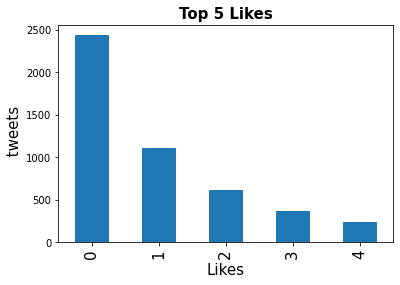

In [49]:
# visualize the results

tweets_by_Likes = analysis_tweets['Likes'].value_counts()
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Likes', fontsize=15)
ax.set_ylabel(' tweets' , fontsize=15)
ax.set_title('Top 5 Likes', fontsize=15, fontweight='bold')

tweets_by_Likes[:5].plot(ax=ax, kind='bar')

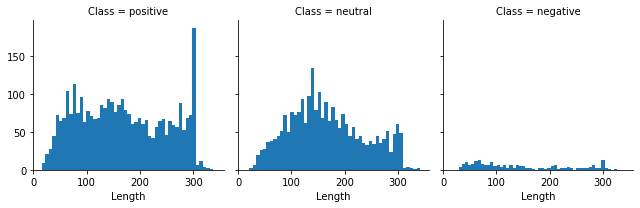

In [50]:
g = sns.FacetGrid(data=analysis_tweets, col='Class') # sperate based on Class 
g.map(plt.hist, 'Length', bins=50)